In [15]:
import numpy as np
from numpy import sum as arraysum
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
df=pd.read_csv("Z:\Tech Development\Tech Development projects\EM-089 Application Of Arrhenius Equation - for HbA1c products\Results\Database of Results csv1a.csv")

In [17]:
df['Lot'].unique()

array(['Lot_A', 'Lot_B', 'Lot_C', 'Lot_D'], dtype=object)

In [18]:
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=0.9) 
sns.set_style('ticks')

fil_df1 = df[((df['Level'] == 1)|(df['Level'] == 2)) & ((df['Lot'] == 'Lot_C')|(df['Lot'] == 'Lot_D'))]
fil_df1

,A1c,A0,A1a,LA1c,Haem,Lot,Level,Temp,Day,Unnamed: 9
64,5.73,NaN,NaN,NaN,14.65,Lot_C,1,45,0,NaN
65,5.71,NaN,NaN,NaN,14.36,Lot_C,1,45,0,NaN
66,5.66,NaN,NaN,NaN,14.53,Lot_C,1,45,0,NaN
67,5.70,NaN,NaN,NaN,14.31,Lot_C,1,45,0,NaN
68,5.73,NaN,NaN,NaN,15.17,Lot_C,1,45,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1571,10.90,NaN,NaN,NaN,12.76,Lot_D,2,25,200,NaN
1572,10.80,NaN,NaN,NaN,12.93,Lot_D,2,25,200,NaN
1573,10.90,NaN,NaN,NaN,12.69,Lot_D,2,25,200,NaN
1574,10.80,NaN,NaN,NaN,12.76,Lot_D,2,25,200,NaN


In [19]:
fil_df2 = df[((df['Level'] == 1)|(df['Level'] == 2)) & (df['Lot'] == 'Lot_D')]
fil_df2

,A1c,A0,A1a,LA1c,Haem,Lot,Level,Temp,Day,Unnamed: 9
96,5.1,92.7,0.6,1.6,14.10,Lot_D,1,45,0,NaN
97,5.1,92.8,0.6,1.6,13.42,Lot_D,1,45,0,NaN
98,5.1,92.8,0.6,1.5,14.29,Lot_D,1,45,0,NaN
99,5.1,92.8,0.6,1.5,14.14,Lot_D,1,45,0,NaN
100,5.1,92.8,0.6,1.5,14.25,Lot_D,1,45,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1571,10.9,NaN,NaN,NaN,12.76,Lot_D,2,25,200,NaN
1572,10.8,NaN,NaN,NaN,12.93,Lot_D,2,25,200,NaN
1573,10.9,NaN,NaN,NaN,12.69,Lot_D,2,25,200,NaN
1574,10.8,NaN,NaN,NaN,12.76,Lot_D,2,25,200,NaN


In [20]:
fil_df1["Haem"]

64      14.65
65      14.36
66      14.53
67      14.31
68      15.17
        ...  
1571    12.76
1572    12.93
1573    12.69
1574    12.76
1575    13.03
Name: Haem, Length: 968, dtype: float64

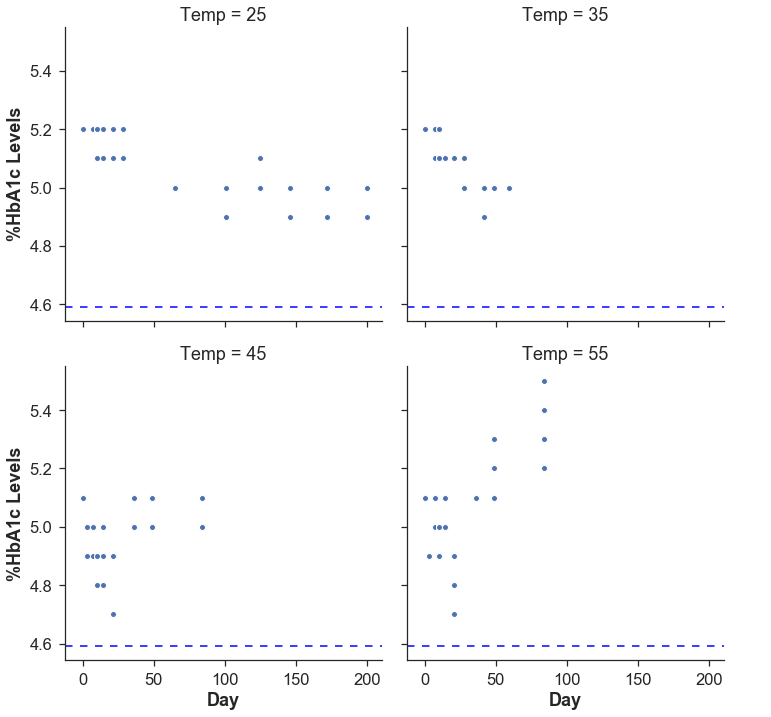

In [12]:
sns.set(style="ticks", color_codes=True, font_scale =1.5)
g = sns.FacetGrid(fil_df2.query("Level==1"), col="Temp",  col_wrap=2, height=5, palette="Set1")
g = g.map(plt.scatter, "Day", "A1c", edgecolor="w").add_legend()
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 6
g.map(plt.axhline, y=4.59, ls=(0, (5, 5)), c="blue")
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1.0) 
sns.set_style('ticks')
sns.despine()
g.set_xlabels("Day",fontweight='bold', size=18)
g.set_ylabels("%HbA1c Levels",fontweight='bold', size=18)
g.savefig("HbA1c_L1_Facet_200");

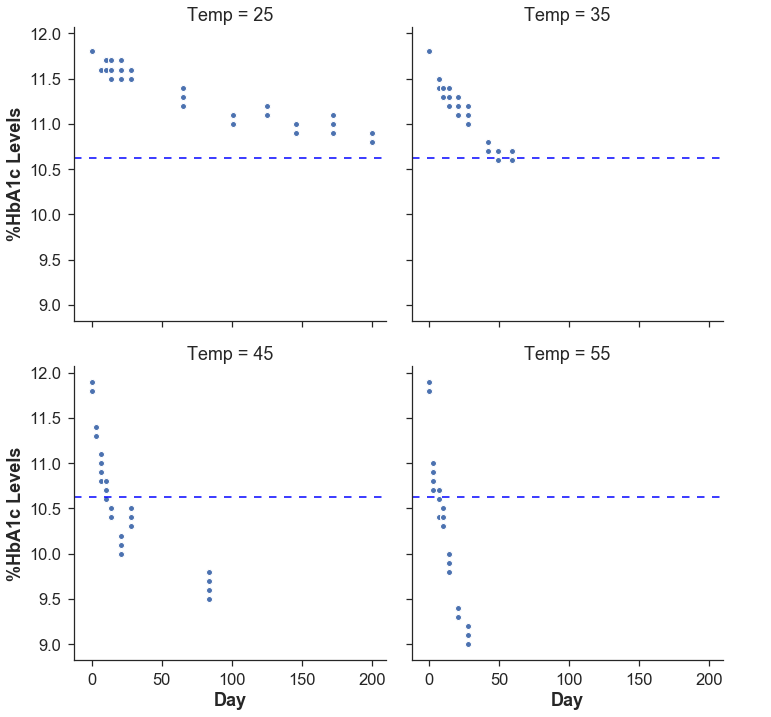

In [21]:
sns.set(style="ticks", color_codes=True, font_scale =1.5)
g = sns.FacetGrid(fil_df2.query("Level==2"), col="Temp",  col_wrap=2, height=5)
g = g.map(plt.scatter, "Day", "A1c", edgecolor="w").add_legend()
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 6
g.map(plt.axhline, y=10.62, ls=(0, (5, 5)), c="blue")
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1.0) 
sns.set_style('ticks')
sns.despine()
g.set_xlabels("Day",fontweight='bold', size=18)
g.set_ylabels("%HbA1c Levels",fontweight='bold', size=18)
g.savefig("HbA1c_L2_Facet_Final1_200");

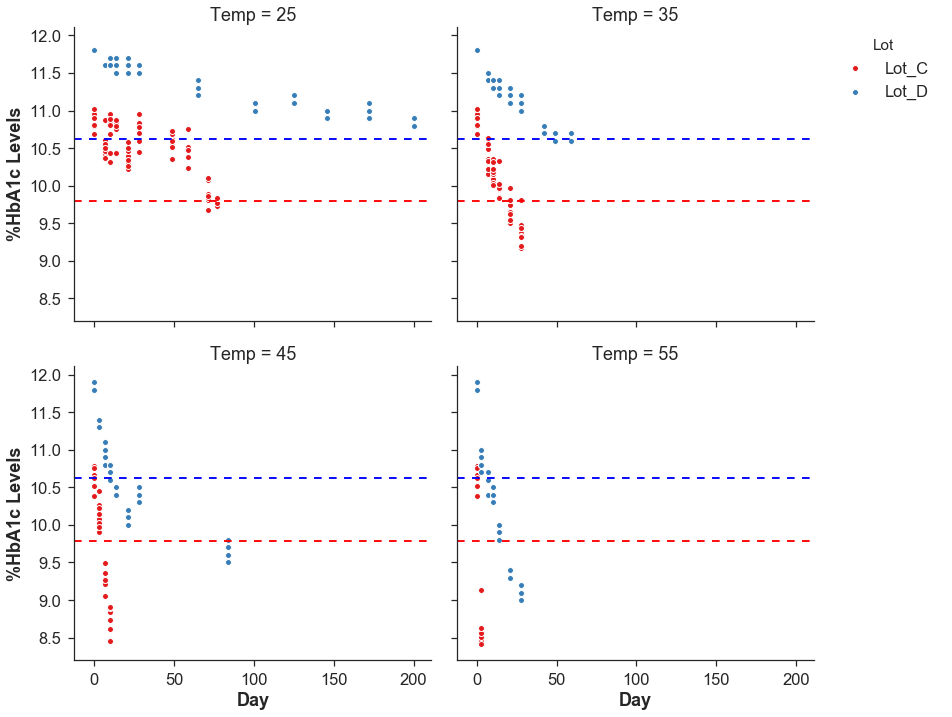

In [22]:
sns.set(style="ticks", color_codes=True, font_scale =1.5)
g = sns.FacetGrid(fil_df1.query("Level==2"), col="Temp",  col_wrap=2, hue='Lot', height=5, palette="Set1")
g = g.map(plt.scatter, "Day", "A1c", edgecolor="w").add_legend()
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 6
g.map(plt.axhline, y=9.79, ls=(0, (5, 5)), c="red")
g.map(plt.axhline, y=10.62, ls=(0, (5, 5)), c="blue")
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1.0) 
sns.set_style('ticks')
sns.despine()
g.set_xlabels("Day",fontweight='bold', size=18)
g.set_ylabels("%HbA1c Levels",fontweight='bold', size=18)
g.savefig("HbA1c_L2_Facet_Final3_200");

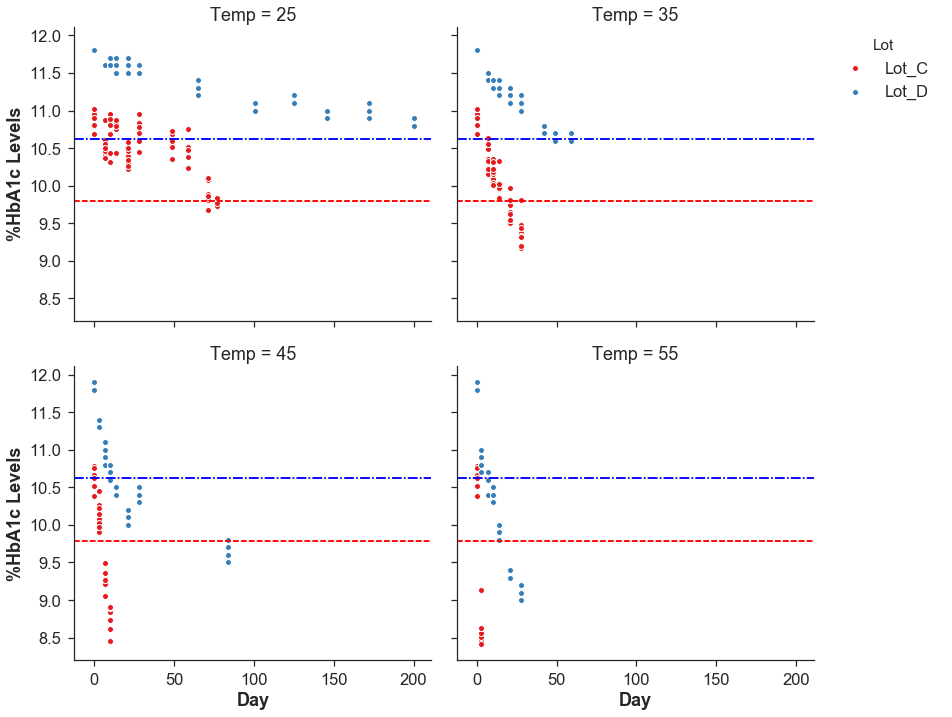

In [23]:
sns.set(style="ticks", color_codes=True, font_scale =1.5)
g = sns.FacetGrid(fil_df1.query("Level==2"), col="Temp",  col_wrap=2, hue='Lot', height=5, palette="Set1")
g = g.map(plt.scatter, "Day", "A1c", edgecolor="w").add_legend()
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 6
g.map(plt.axhline, y=9.79, ls=("--"), c="red")
g.map(plt.axhline, y=10.62, ls=("-."), c="blue")
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1.0) 
sns.set_style('ticks')
sns.despine()
g.set_xlabels("Day",fontweight='bold', size=18)
g.set_ylabels("%HbA1c Levels",fontweight='bold', size=18)
g.savefig("HbA1c_L2_Facet_Final");

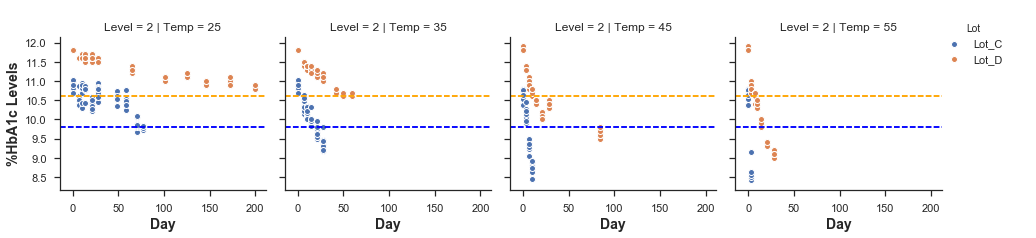

In [24]:
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(fil_df1.query("Level==2"), col="Temp",  row="Level", hue='Lot')
g = g.map(plt.scatter, "Day", "A1c", edgecolor="w").add_legend()
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 6
g.map(plt.axhline, y=10.62, ls="--", c="orange")
g.map(plt.axhline, y=9.79, ls="--", c="blue")
sns.set(rc={'figure.figsize':(25,25)}) 
sns.set_context('talk', font_scale=0.5) 
sns.set_style('ticks')
sns.despine()
g.set_xlabels("Day",fontweight='bold', size=14)
g.set_ylabels("%HbA1c Levels",fontweight='bold', size=14);

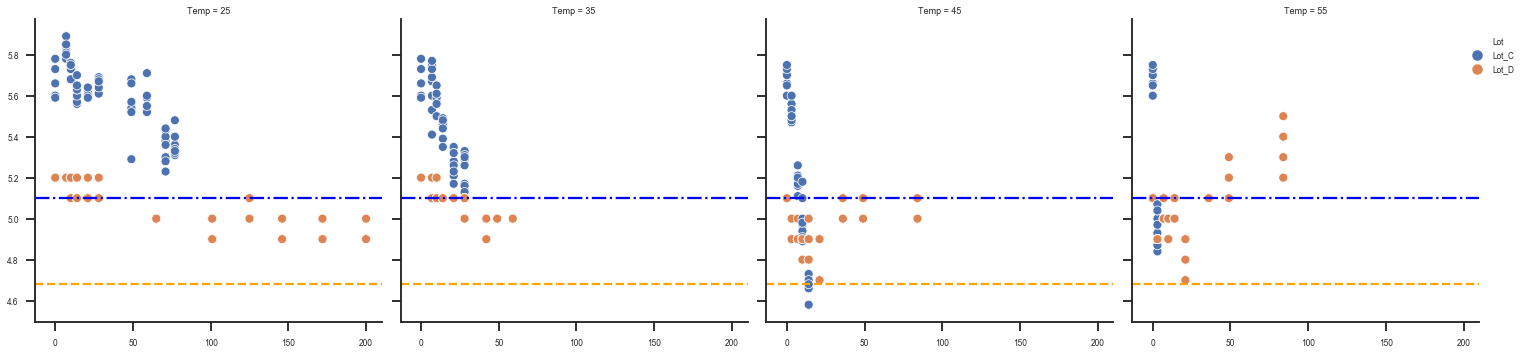

In [25]:
g=sns.relplot(x='Day', y='A1c', data=fil_df1.query('Level==1'), hue='Lot', 
            col='Temp')
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 9  # if required you can set the loc
plt.xlabel("Day",fontweight='bold', size=15)
plt.ylabel("HbA1c Levels",fontweight='bold', size=20)
g.map(plt.axhline, y=4.68, ls="--", c="orange")
g.map(plt.axhline, y=5.10, ls="-.", c="blue")

sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1) 
sns.set_style('ticks')
g.savefig("HbA1c_L1_Facet_70")

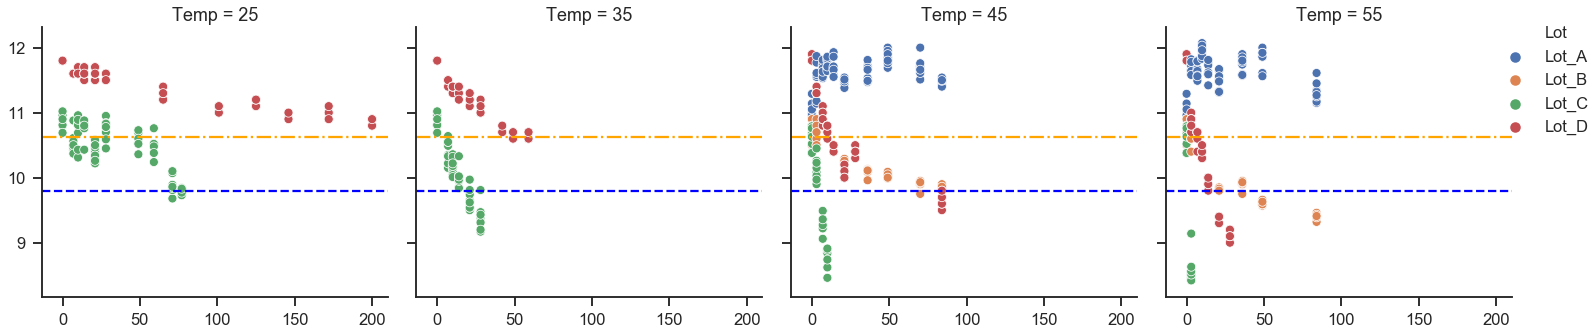

In [26]:
g=sns.relplot(x='Day', y='A1c', data=df.query('Level==2'), hue='Lot', 
            col='Temp')
ax=plt.gca()
ax.set(xlabel = 'Day', ylabel = 'A1c')
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 9  # if required you can set the loc
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 18
g.map(plt.axhline, y=9.79, ls="--", c="blue")
g.map(plt.axhline, y=10.62, ls="-.", c="orange")


sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1) 
sns.set_style('ticks')
g.savefig("HbA1c_L2_Facet_70")

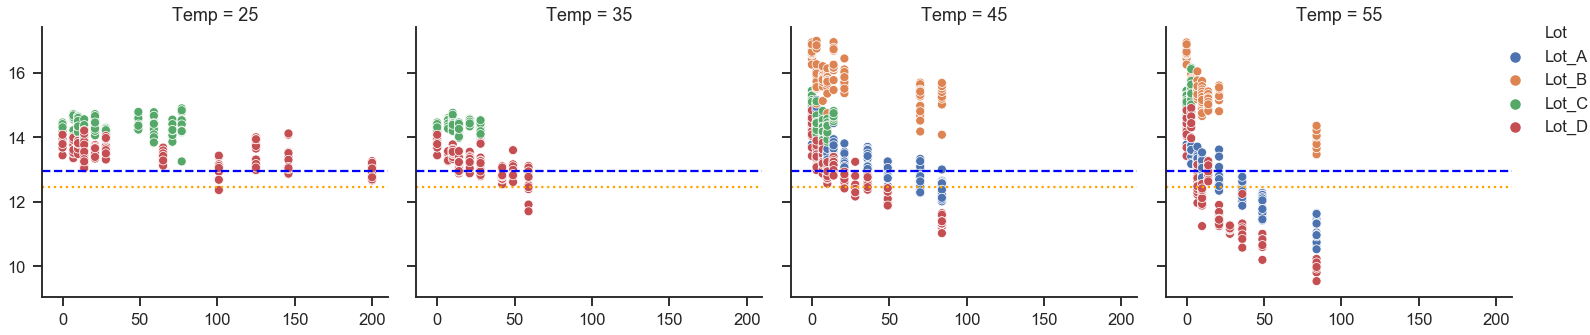

In [27]:
g=sns.relplot(x='Day', y='Haem', data=df, hue='Lot', 
            col='Temp')
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 9  # if required you can set the loc

g.set_xlabels("Day",fontweight='bold', size=20)
g.set_ylabels("HbA1c Levels",fontweight='bold', size=20)
g.map(plt.axhline, y=12.94, ls="--", c="blue")
g.map(plt.axhline, y=12.45, ls=":", c="orange")

sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1) 
sns.set_style('ticks')
g.savefig("Haem_Facet_70")

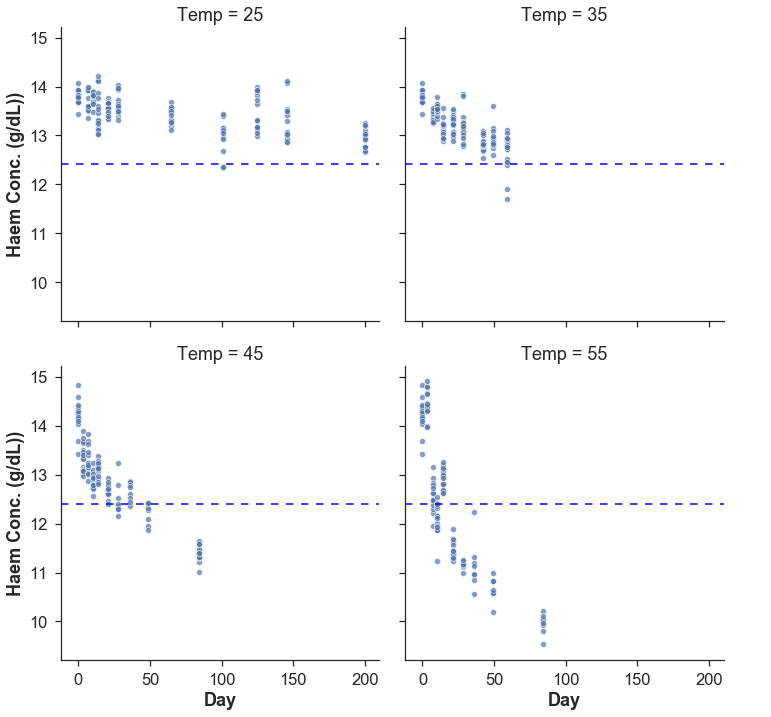

In [29]:
sns.set(style="ticks", color_codes=True, font_scale =1.5)
g = sns.FacetGrid(fil_df2, col="Temp",  col_wrap=2, height=5, palette="Set1" )
g = g.map(sns.scatterplot, "Day", "Haem", alpha=0.7).add_legend()
leg = g._legend
leg.set_bbox_to_anchor([1,0.9])
leg._loc = 6
g.map(plt.axhline, y=12.41, ls=(0, (5, 5)), c="blue")
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=1.0) 
sns.set_style('ticks')
sns.despine()
g.set_xlabels("Day",fontweight='bold', size=18)
g.set_ylabels("Haem Conc. (g/dL))",fontweight='bold', size=18)
g.savefig("Haem2_Facet_Final");